# Hockey Economy Analysis
### Xander Hieken

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
from numpy import array
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from keras.optimizers import RMSprop

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

df = pd.read_csv("CleanHockeyData.csv")
df = df.round(5)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Name')

Using TensorFlow backend.


### Selecting the columns to keep and their order

In [4]:
data = df.loc[:,['pctCap','TOI','pyTOI','Goals60','pyGoals60','Assists60','pyAssists60','PlusMinus60',
                 'pyPlusMinus60','PenaltyMinutes60','pyPenaltyMinutes60','EvenStrGoals60','pyEvenStrGoals60',
                 'ppGoals60','pyppGoals60','shGoals60','pyshGoals60','GameWinningGoals60','pyGameWinningGoals60',
                 'Shots60','pyShots60','Country.Austria','Country.Canada','Country.Czech Republic',
                 'Country.Denmark','Country.Estonia','Country.Finland','Country.France','Country.Germany',
                 'Country.Latvia','Country.Norway','Country.Russia','Country.Slovakia','Country.Slovenia',
                 'Country.Sweden','Country.Switzerland','Country.United Kingdom','Country.United States',
                 'Team.ANA','Team.ARI','Team.BOS','Team.BUF','Team.CAR','Team.CBJ','Team.CGY','Team.CHI','Team.COL',
                 'Team.DAL','Team.DET','Team.EDM','Team.FLA','Team.LAK','Team.MIN','Team.MTL','Team.NJD','Team.NSH',
                 'Team.NYI','Team.NYR','Team.OTT','Team.PHI','Team.PIT','Team.SJS','Team.STL','Team.TBL','Team.TOR',
                 'Team.VAN','Team.VGK','Team.WPG','Team.WSH','Handed.R','Position.C','Position.R']]

### Loading the data, splitting it into testing and training sets, and converting to NumPy arrays

In [3]:
# duplicating the dataset
dataset = data

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_labels = train_dataset.pop('pctCap')
test_labels = test_dataset.pop('pctCap')

train_dataset = np.array(train_dataset)
test_dataset = np.array(test_dataset)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

### Building a neural network in Keras

In [4]:
def build_model():
  model = keras.Sequential([
    layers.Dense(42, activation='linear', kernel_initializer='VarianceScaling', 
                 input_shape=[71]),
    layers.Dense(59, activation='linear'),  
    layers.Dense(1)
  ])
  
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
  return model

model = build_model()

### Description of the neural network

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                3024      
_________________________________________________________________
dense_1 (Dense)              (None, 59)                2537      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 60        
Total params: 5,621
Trainable params: 5,621
Non-trainable params: 0
_________________________________________________________________


### Training the neural network

In [6]:
history = model.fit(train_dataset, train_labels, epochs=1000, 
                    validation_split = 0.2, batch_size=1, verbose=1)

Train on 195 samples, validate on 49 samples
Epoch 1/1000
195/195 [==============================] - 1s 4ms/sample - loss: 3645.3919 - mae: 25.2646 - mse: 3645.3921 - val_loss: 0.8175 - val_mae: 0.7352 - val_mse: 0.8175
Epoch 2/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.6411 - mae: 0.6573 - mse: 0.6411 - val_loss: 0.3506 - val_mae: 0.4696 - val_mse: 0.3506
Epoch 3/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.7573 - mae: 0.6738 - mse: 0.7573 - val_loss: 1.1384 - val_mae: 0.9147 - val_mse: 1.1384
Epoch 4/1000
195/195 [==============================] - 0s 1ms/sample - loss: 1.1266 - mae: 0.8536 - mse: 1.1266 - val_loss: 3.8786 - val_mae: 1.8441 - val_mse: 3.8786
Epoch 5/1000
195/195 [==============================] - 0s 1ms/sample - loss: 1.6742 - mae: 0.9496 - mse: 1.6742 - val_loss: 0.3980 - val_mae: 0.4994 - val_mse: 0.3980
Epoch 6/1000
195/195 [==============================] - 0s 1ms/sample - loss: 2.4708 - mae: 1.2127 - mse: 2.

Epoch 49/1000
195/195 [==============================] - 0s 1ms/sample - loss: 134.0303 - mae: 7.1054 - mse: 134.0303 - val_loss: 0.1154 - val_mae: 0.2546 - val_mse: 0.1154
Epoch 50/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0712 - mae: 0.1856 - mse: 0.0712 - val_loss: 0.0250 - val_mae: 0.1200 - val_mse: 0.0250
Epoch 51/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0866 - mae: 0.2155 - mse: 0.0866 - val_loss: 0.0825 - val_mae: 0.2659 - val_mse: 0.0825
Epoch 52/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0727 - mae: 0.2086 - mse: 0.0727 - val_loss: 0.0330 - val_mae: 0.1513 - val_mse: 0.0330
Epoch 53/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0404 - mae: 0.1515 - mse: 0.0404 - val_loss: 0.0372 - val_mae: 0.1576 - val_mse: 0.0372
Epoch 54/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0409 - mae: 0.1599 - mse: 0.0409 - val_loss: 0.0798 - val_mae: 0.2230 

195/195 [==============================] - 0s 1ms/sample - loss: 0.0036 - mae: 0.0400 - mse: 0.0036 - val_loss: 0.0139 - val_mae: 0.0870 - val_mse: 0.0139
Epoch 146/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0097 - mae: 0.0612 - mse: 0.0097 - val_loss: 0.0033 - val_mae: 0.0444 - val_mse: 0.0033
Epoch 147/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0141 - mae: 0.0753 - mse: 0.0141 - val_loss: 0.0020 - val_mae: 0.0314 - val_mse: 0.0020
Epoch 148/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.4270 - mae: 0.3501 - mse: 0.4270 - val_loss: 0.0014 - val_mae: 0.0312 - val_mse: 0.0014
Epoch 149/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0026 - mae: 0.0388 - mse: 0.0026 - val_loss: 0.0012 - val_mae: 0.0267 - val_mse: 0.0012
Epoch 150/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0018 - mae: 0.0319 - mse: 0.0018 - val_loss: 0.0025 - val_mae: 0.0388 - val_mse: 0.

195/195 [==============================] - 0s 1ms/sample - loss: 0.0030 - mae: 0.0406 - mse: 0.0030 - val_loss: 7.6216e-04 - val_mae: 0.0231 - val_mse: 7.6216e-04
Epoch 238/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0017 - mae: 0.0319 - mse: 0.0017 - val_loss: 0.0038 - val_mae: 0.0553 - val_mse: 0.0038
Epoch 239/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0014 - mae: 0.0307 - mse: 0.0014 - val_loss: 9.9954e-04 - val_mae: 0.0234 - val_mse: 9.9954e-04
Epoch 240/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - val_loss: 0.0015 - val_mae: 0.0343 - val_mse: 0.0015
Epoch 241/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - val_loss: 7.6722e-04 - val_mae: 0.0225 - val_mse: 7.6722e-04
Epoch 242/1000
195/195 [==============================] - 0s 1ms/sample - loss: 7.9182e-04 - mae: 0.0223 - mse: 7.9182e-04 - val_loss: 9.9910

195/195 [==============================] - 0s 1ms/sample - loss: 5.7326e-04 - mae: 0.0187 - mse: 5.7326e-04 - val_loss: 8.3447e-04 - val_mae: 0.0210 - val_mse: 8.3447e-04
Epoch 328/1000
195/195 [==============================] - 0s 1ms/sample - loss: 6.4240e-04 - mae: 0.0201 - mse: 6.4239e-04 - val_loss: 0.0013 - val_mae: 0.0271 - val_mse: 0.0013
Epoch 329/1000
195/195 [==============================] - 0s 1ms/sample - loss: 7.1464e-04 - mae: 0.0200 - mse: 7.1464e-04 - val_loss: 0.0011 - val_mae: 0.0285 - val_mse: 0.0011
Epoch 330/1000
195/195 [==============================] - 0s 1ms/sample - loss: 7.4814e-04 - mae: 0.0206 - mse: 7.4814e-04 - val_loss: 0.0011 - val_mae: 0.0259 - val_mse: 0.0011
Epoch 331/1000
195/195 [==============================] - 0s 1ms/sample - loss: 8.3430e-04 - mae: 0.0224 - mse: 8.3430e-04 - val_loss: 5.2778e-04 - val_mae: 0.0180 - val_mse: 5.2778e-04
Epoch 332/1000
195/195 [==============================] - 0s 1ms/sample - loss: 6.1578e-04 - mae: 0.0196 - ms

Epoch 372/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - val_loss: 5.8753e-04 - val_mae: 0.0202 - val_mse: 5.8753e-04
Epoch 373/1000
195/195 [==============================] - 0s 1ms/sample - loss: 6.2566e-04 - mae: 0.0191 - mse: 6.2566e-04 - val_loss: 7.0807e-04 - val_mae: 0.0222 - val_mse: 7.0807e-04
Epoch 374/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.1731e-04 - mae: 0.0165 - mse: 5.1731e-04 - val_loss: 5.9075e-04 - val_mae: 0.0200 - val_mse: 5.9075e-04
Epoch 375/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.2032e-04 - mae: 0.0181 - mse: 5.2032e-04 - val_loss: 4.8880e-04 - val_mae: 0.0170 - val_mse: 4.8880e-04
Epoch 376/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.6025e-04 - mae: 0.0184 - mse: 5.6025e-04 - val_loss: 5.3905e-04 - val_mae: 0.0177 - val_mse: 5.3905e-04
Epoch 377/1000
195/195 [==============================] - 0s 1ms/sample - loss

Epoch 417/1000
195/195 [==============================] - 0s 1ms/sample - loss: 6.6258e-04 - mae: 0.0204 - mse: 6.6258e-04 - val_loss: 7.4358e-04 - val_mae: 0.0202 - val_mse: 7.4358e-04
Epoch 418/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - val_loss: 8.6378e-04 - val_mae: 0.0257 - val_mse: 8.6378e-04
Epoch 419/1000
195/195 [==============================] - 0s 1ms/sample - loss: 9.4834e-04 - mae: 0.0233 - mse: 9.4834e-04 - val_loss: 5.3917e-04 - val_mae: 0.0177 - val_mse: 5.3917e-04
Epoch 420/1000
195/195 [==============================] - 0s 1ms/sample - loss: 7.0325e-04 - mae: 0.0204 - mse: 7.0325e-04 - val_loss: 9.7484e-04 - val_mae: 0.0275 - val_mse: 9.7484e-04
Epoch 421/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.9038e-04 - mae: 0.0193 - mse: 5.9038e-04 - val_loss: 9.5169e-04 - val_mae: 0.0236 - val_mse: 9.5169e-04
Epoch 422/1000
195/195 [==============================] - 0s 1ms/sample - loss

195/195 [==============================] - 0s 1ms/sample - loss: 4.9023e-04 - mae: 0.0172 - mse: 4.9023e-04 - val_loss: 4.3648e-04 - val_mae: 0.0163 - val_mse: 4.3648e-04
Epoch 506/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.8460e-04 - mae: 0.0172 - mse: 4.8460e-04 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011
Epoch 507/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.0206e-04 - mae: 0.0175 - mse: 5.0206e-04 - val_loss: 4.9484e-04 - val_mae: 0.0180 - val_mse: 4.9484e-04
Epoch 508/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.7953e-04 - mae: 0.0168 - mse: 4.7953e-04 - val_loss: 4.4618e-04 - val_mae: 0.0168 - val_mse: 4.4618e-04
Epoch 509/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.2809e-04 - mae: 0.0182 - mse: 5.2809e-04 - val_loss: 4.5969e-04 - val_mae: 0.0172 - val_mse: 4.5969e-04
Epoch 510/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.1305e-04 - 

195/195 [==============================] - 0s 1ms/sample - loss: 3.6476e-04 - mae: 0.0142 - mse: 3.6476e-04 - val_loss: 8.3000e-04 - val_mae: 0.0235 - val_mse: 8.3000e-04
Epoch 594/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.9271e-04 - mae: 0.0150 - mse: 3.9271e-04 - val_loss: 4.7404e-04 - val_mae: 0.0171 - val_mse: 4.7404e-04
Epoch 595/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.6006e-04 - mae: 0.0145 - mse: 3.6006e-04 - val_loss: 4.4814e-04 - val_mae: 0.0161 - val_mse: 4.4814e-04
Epoch 596/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.7956e-04 - mae: 0.0152 - mse: 3.7956e-04 - val_loss: 5.0623e-04 - val_mae: 0.0180 - val_mse: 5.0623e-04
Epoch 597/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.0280e-04 - mae: 0.0157 - mse: 4.0280e-04 - val_loss: 4.5042e-04 - val_mae: 0.0163 - val_mse: 4.5042e-04
Epoch 598/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.328

195/195 [==============================] - 0s 1ms/sample - loss: 5.1295e-04 - mae: 0.0176 - mse: 5.1295e-04 - val_loss: 5.4800e-04 - val_mae: 0.0192 - val_mse: 5.4800e-04
Epoch 682/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.8316e-04 - mae: 0.0150 - mse: 3.8316e-04 - val_loss: 4.5397e-04 - val_mae: 0.0168 - val_mse: 4.5398e-04
Epoch 683/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.7833e-04 - mae: 0.0148 - mse: 3.7833e-04 - val_loss: 7.9614e-04 - val_mae: 0.0225 - val_mse: 7.9614e-04
Epoch 684/1000
195/195 [==============================] - 0s 1ms/sample - loss: 8.9338e-04 - mae: 0.0233 - mse: 8.9338e-04 - val_loss: 8.9467e-04 - val_mae: 0.0254 - val_mse: 8.9467e-04
Epoch 685/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.8634e-04 - mae: 0.0189 - mse: 5.8634e-04 - val_loss: 9.5391e-04 - val_mae: 0.0263 - val_mse: 9.5391e-04
Epoch 686/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.424

195/195 [==============================] - 0s 1ms/sample - loss: 4.4538e-04 - mae: 0.0162 - mse: 4.4538e-04 - val_loss: 4.8372e-04 - val_mae: 0.0175 - val_mse: 4.8372e-04
Epoch 770/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.0332e-04 - mae: 0.0153 - mse: 4.0332e-04 - val_loss: 4.6835e-04 - val_mae: 0.0157 - val_mse: 4.6835e-04
Epoch 771/1000
195/195 [==============================] - 0s 1ms/sample - loss: 0.0118 - mae: 0.0555 - mse: 0.0118 - val_loss: 6.2538e-04 - val_mae: 0.0188 - val_mse: 6.2538e-04
Epoch 772/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.6134e-04 - mae: 0.0186 - mse: 5.6134e-04 - val_loss: 5.1915e-04 - val_mae: 0.0185 - val_mse: 5.1915e-04
Epoch 773/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.1724e-04 - mae: 0.0174 - mse: 5.1724e-04 - val_loss: 4.8748e-04 - val_mae: 0.0168 - val_mse: 4.8748e-04
Epoch 774/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.1694e-04 - 

195/195 [==============================] - 0s 1ms/sample - loss: 0.0010 - mae: 0.0228 - mse: 0.0010 - val_loss: 4.8090e-04 - val_mae: 0.0169 - val_mse: 4.8090e-04
Epoch 858/1000
195/195 [==============================] - 0s 1ms/sample - loss: 7.6232e-04 - mae: 0.0210 - mse: 7.6232e-04 - val_loss: 4.6792e-04 - val_mae: 0.0170 - val_mse: 4.6792e-04
Epoch 859/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.4128e-04 - mae: 0.0161 - mse: 4.4128e-04 - val_loss: 5.2304e-04 - val_mae: 0.0189 - val_mse: 5.2304e-04
Epoch 860/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.8169e-04 - mae: 0.0152 - mse: 3.8169e-04 - val_loss: 6.6122e-04 - val_mae: 0.0195 - val_mse: 6.6122e-04
Epoch 861/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.6392e-04 - mae: 0.0167 - mse: 4.6392e-04 - val_loss: 6.0188e-04 - val_mae: 0.0197 - val_mse: 6.0188e-04
Epoch 862/1000
195/195 [==============================] - 0s 1ms/sample - loss: 5.0277e-04 - 

195/195 [==============================] - 0s 1ms/sample - loss: 4.1306e-04 - mae: 0.0162 - mse: 4.1306e-04 - val_loss: 4.6544e-04 - val_mae: 0.0168 - val_mse: 4.6544e-04
Epoch 946/1000
195/195 [==============================] - 0s 1ms/sample - loss: 4.4487e-04 - mae: 0.0160 - mse: 4.4487e-04 - val_loss: 4.4306e-04 - val_mae: 0.0165 - val_mse: 4.4306e-04
Epoch 947/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.8785e-04 - mae: 0.0149 - mse: 3.8785e-04 - val_loss: 5.3818e-04 - val_mae: 0.0176 - val_mse: 5.3818e-04
Epoch 948/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.5785e-04 - mae: 0.0152 - mse: 3.5785e-04 - val_loss: 4.9655e-04 - val_mae: 0.0176 - val_mse: 4.9655e-04
Epoch 949/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.9874e-04 - mae: 0.0155 - mse: 3.9874e-04 - val_loss: 4.9710e-04 - val_mae: 0.0175 - val_mse: 4.9710e-04
Epoch 950/1000
195/195 [==============================] - 0s 1ms/sample - loss: 3.902

### Checking results of the last few epochs

In [7]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.000378,0.015220,0.000378,0.000505,0.017771,0.000505,995
996,0.000411,0.015524,0.000411,0.000450,0.016552,0.000450,996
997,0.000561,0.019075,0.000561,0.000534,0.018734,0.000534,997
998,0.000409,0.015173,0.000409,0.000887,0.024955,0.000887,998
999,0.000387,0.015374,0.000387,0.000718,0.021689,0.000718,999


### Plot of model's mean absolute error

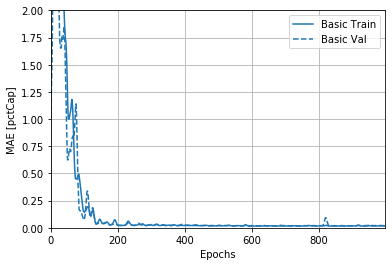

In [8]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 2])
plt.ylabel('MAE [pctCap]');

### Plot of model's mean squared error

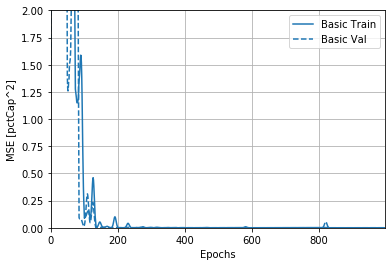

In [9]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 2])
plt.ylabel('MSE [pctCap^2]');

### Metrics for test data

In [10]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.5f} pctCap".format(mae))

61/1 - 0s - loss: 8.1029e-04 - mae: 0.0222 - mse: 7.1154e-04
Testing set Mean Abs Error: 0.02221 pctCap


### Plotting predicted values against true values

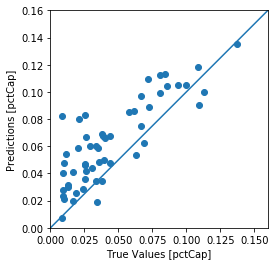

In [11]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pctCap]')
plt.ylabel('Predictions [pctCap]')
lims = [0, .16]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Distribution of prediction error

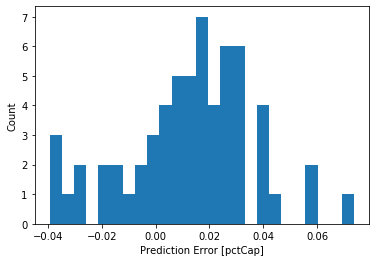

In [12]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [pctCap]")
_ = plt.ylabel("Count")

***
## Testing the neural network's performance on the full dataset

In [13]:
allData = data.iloc[:,1:]
onlypctCap = data.iloc[:,[0]]
preds = model.predict(allData).flatten()
onlypctCap['Preds'] = list(preds)
allData = pd.DataFrame(allData)
dfNN = pd.merge(allData,onlypctCap, left_index=True, right_index=True)

### Plotting the Results

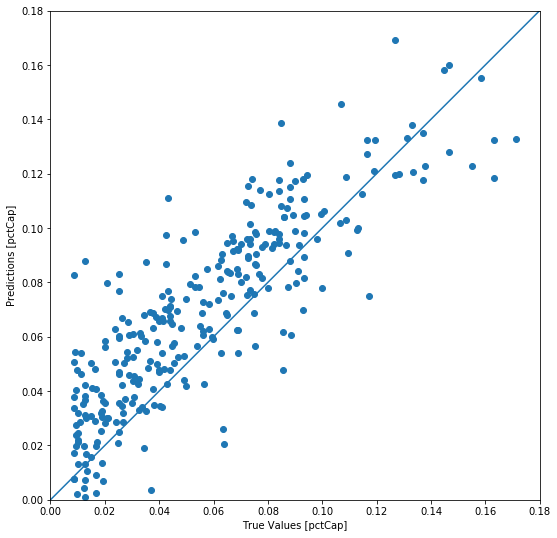

In [14]:
plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(dfNN['pctCap'], dfNN['Preds'])
plt.xlabel('True Values [pctCap]')
plt.ylabel('Predictions [pctCap]')
lims = [0, .18]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Checking metrics for the neural network

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(dfNN['pctCap'], dfNN['Preds']))  
print('Mean Squared Error:', metrics.mean_squared_error(dfNN['pctCap'], dfNN['Preds']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dfNN['pctCap'], dfNN['Preds'])))

Mean Absolute Error: 0.019025536688456527
Mean Squared Error: 0.0005484888218202626
Root Mean Squared Error: 0.023419838210804587


**MAE is 0.019, while the mean of pctCap is only 0.0552**

**This is 34.4% of the mean, so this model isn't going to give very accurate predictions.**

**An example using the 2019 salary cap of $79,500,000.** 

**A prediction that is off by 1.9% is the equivalent of over/underpaying a player by $1,510,500**
***

### Pearson Correlation Heatmap

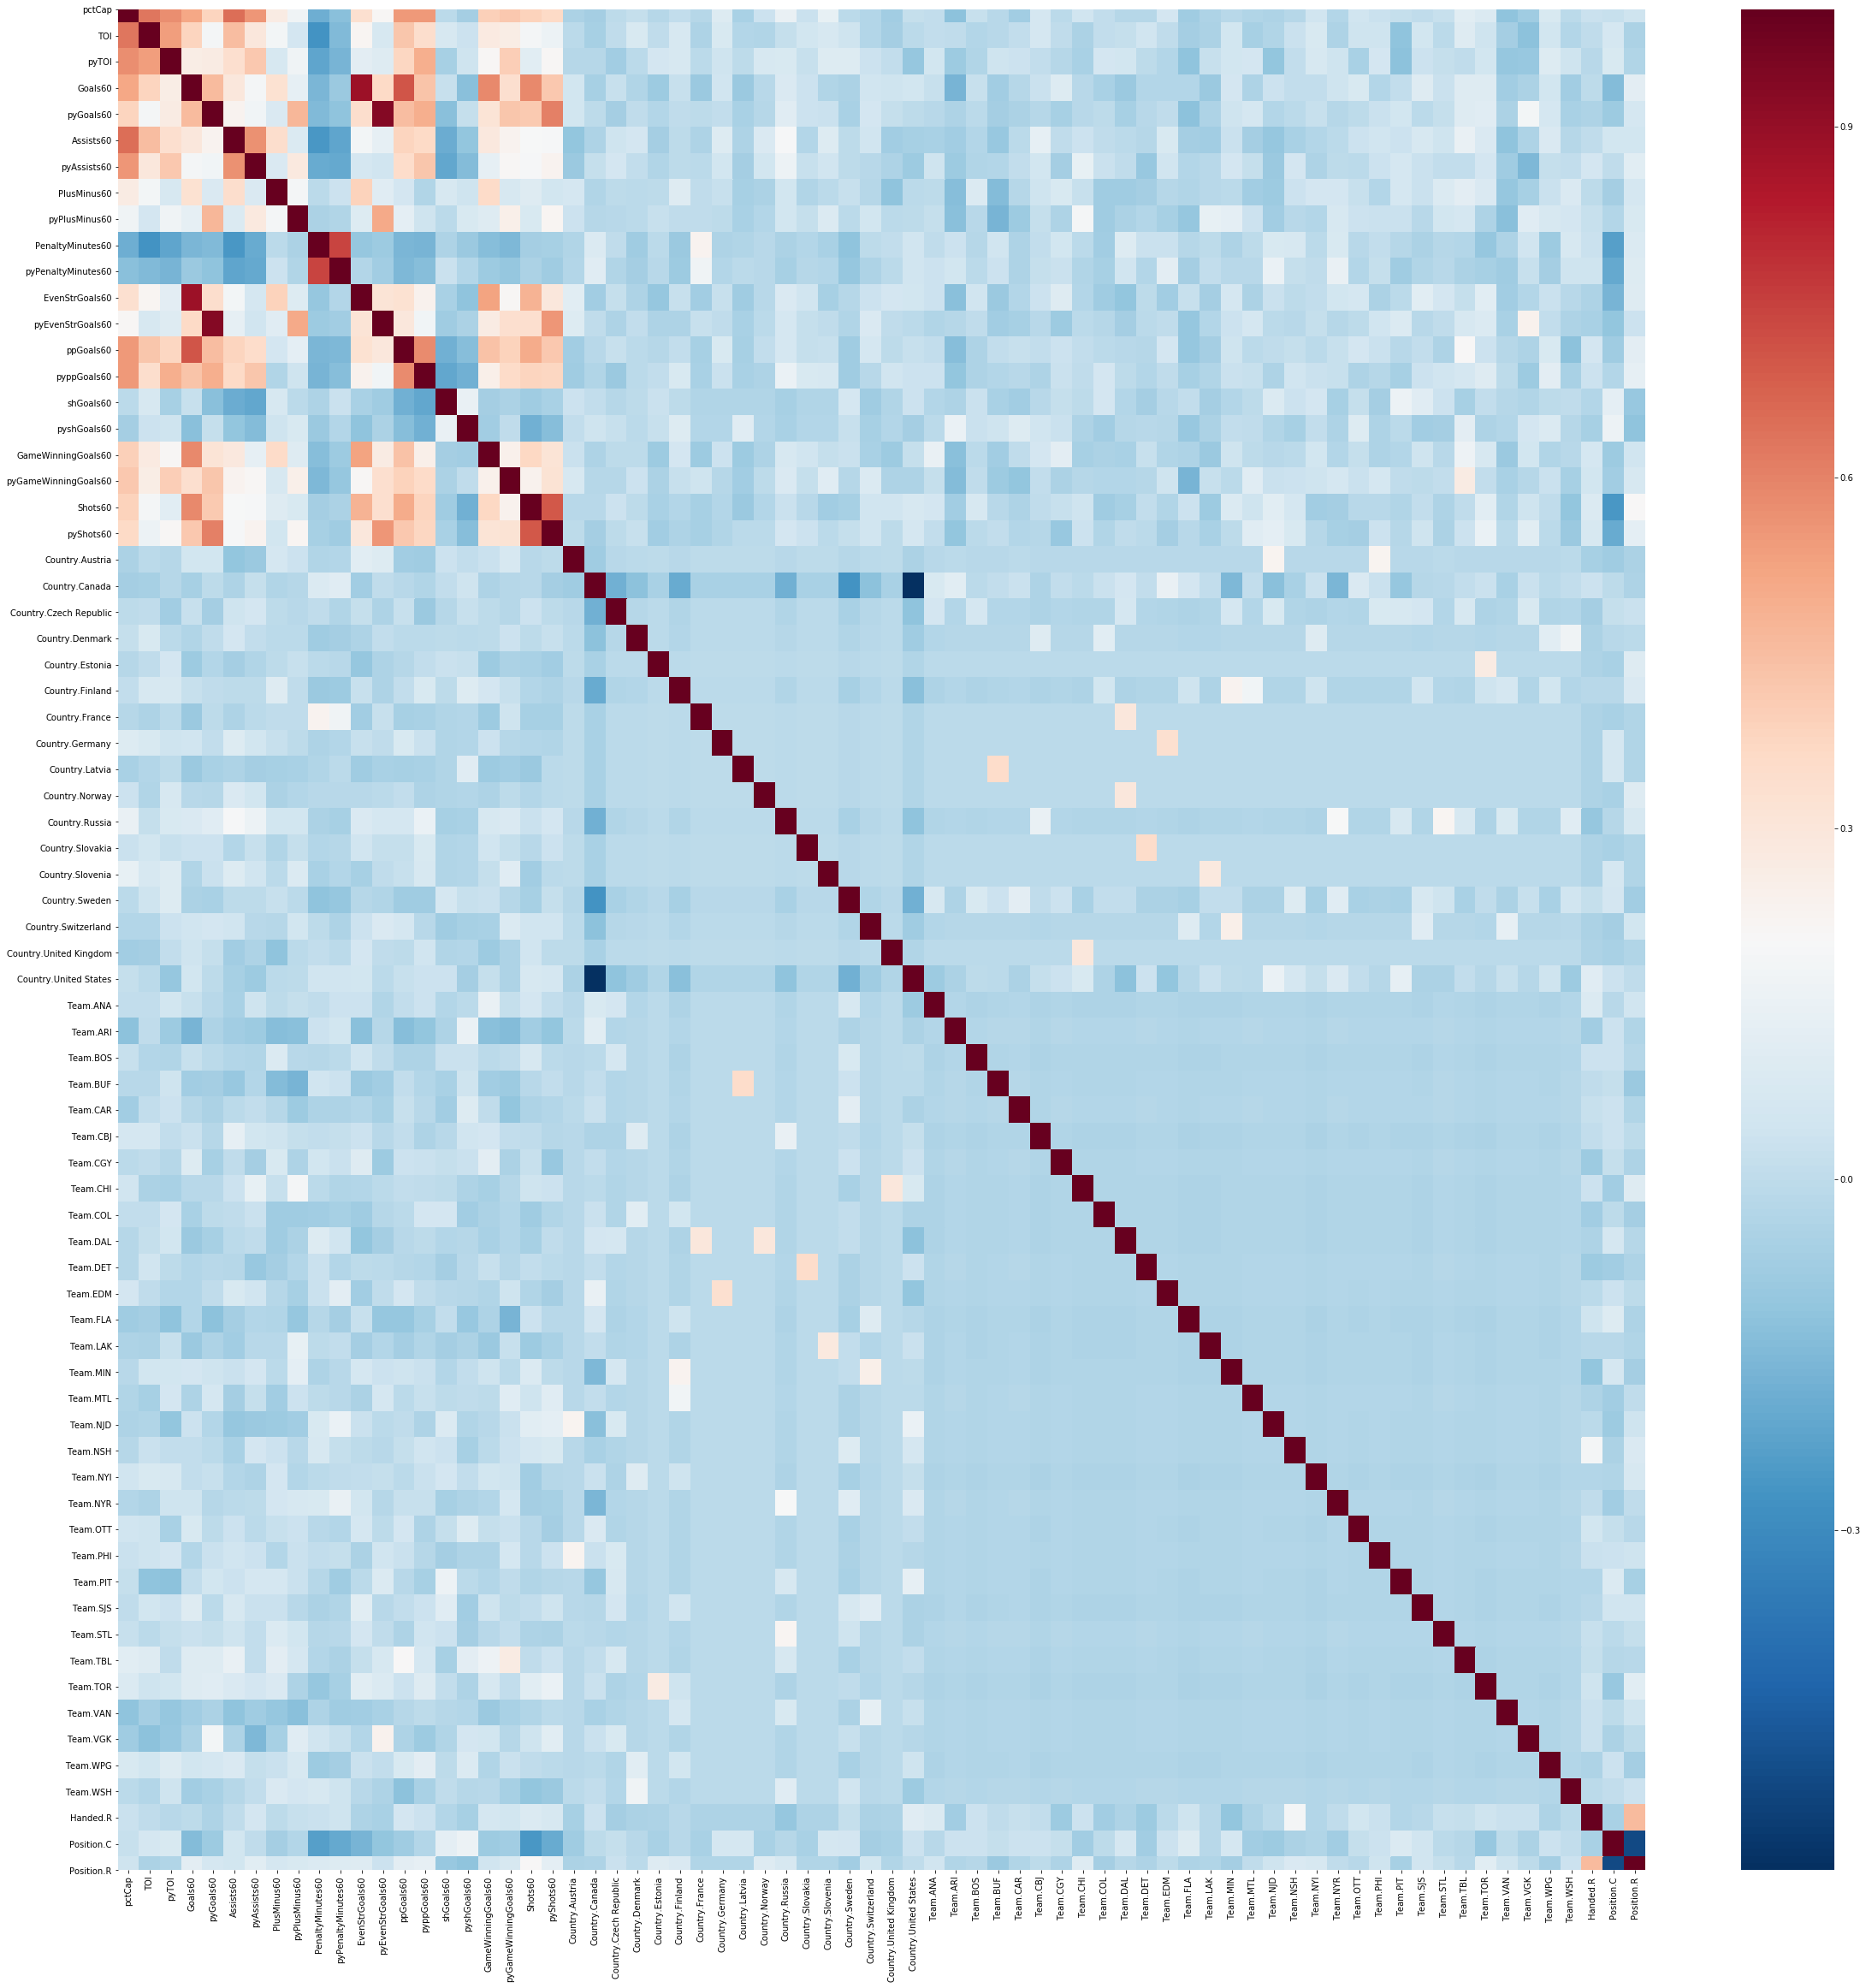

In [16]:
plt.figure(figsize=(40,40))
cor = dataset.corr()
sns.heatmap(cor, annot=False, cmap='RdBu_r')
plt.show()

### Features with a correlation greater than 0.5 with pctCap

In [17]:
cor_target = abs(cor["pctCap"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

pctCap         1.000000
TOI            0.629342
pyTOI          0.574813
Goals60        0.511954
Assists60      0.651576
pyAssists60    0.558081
ppGoals60      0.551564
pyppGoals60    0.550995
Name: pctCap, dtype: float64

***
## Simple Linear Regression 

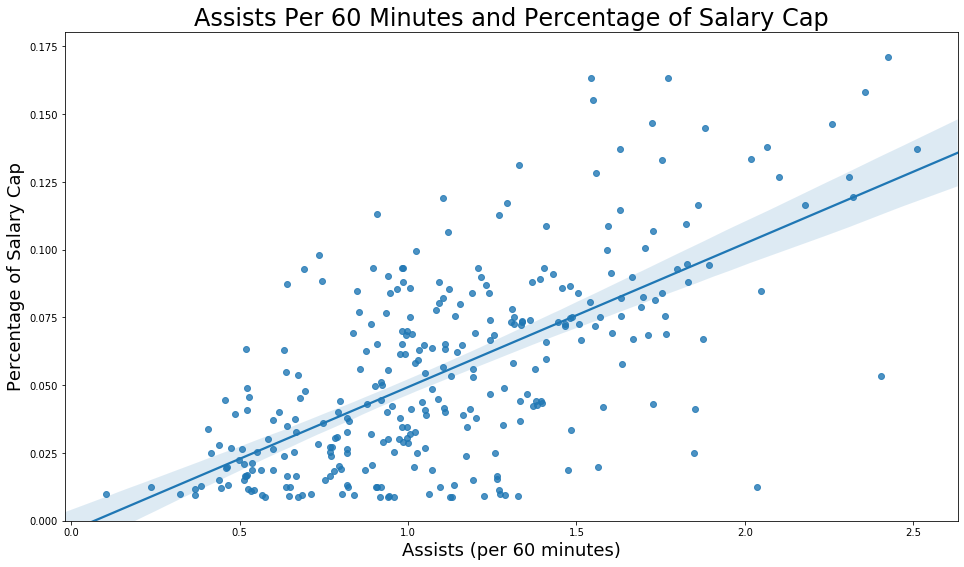

In [18]:
#Making a dataset with only the target variable and the most correlated features
smallDF = df.loc[:,['pctCap','TOI','pyTOI','Goals60','Assists60',
                    'pyAssists60','ppGoals60', 'pyppGoals60']]

#Plotting a linear model for the feature with the highest correlation to pctCap
fig = plt.figure(figsize=(16,9))
sns.regplot(x=smallDF['Assists60'],y=smallDF['pctCap'])
plt.title('Assists Per 60 Minutes and Percentage of Salary Cap', size=24)
plt.xlabel('Assists (per 60 minutes)', size=18)
plt.ylabel('Percentage of Salary Cap', size=18)
plt.ylim(bottom=0);

### Training the linear model and checking predicted results

In [19]:
X = smallDF['Assists60'].values.reshape(-1,1)
y = smallDF['pctCap'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
check = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
check

,Actual,Predicted
0,0.07329,0.063543
1,0.07667,0.043621
2,0.01667,0.021036
3,0.05507,0.027640
4,0.09283,0.090091
...,...,...
56,0.08833,0.033447
57,0.16330,0.088742
58,0.07534,0.073293
59,0.04489,0.051913


### Plotting the test predictions

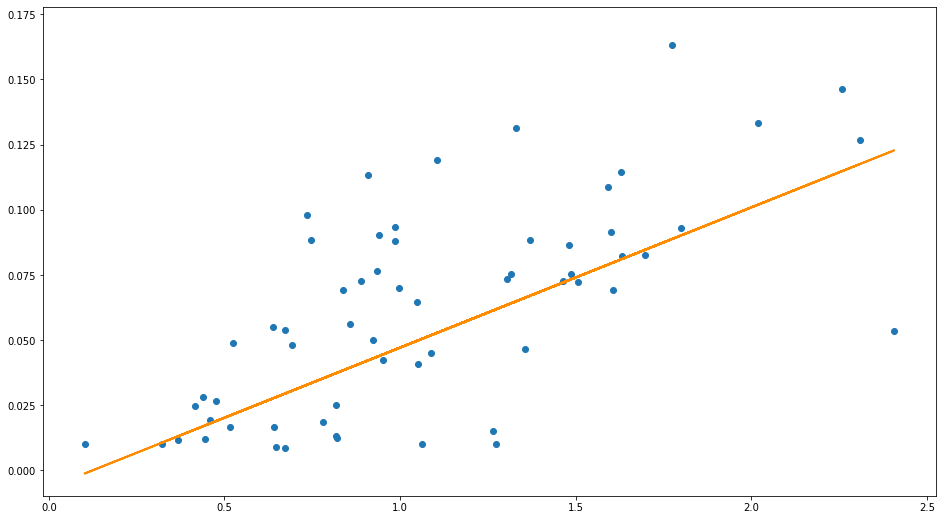

In [20]:
fig = plt.figure(figsize=(16,9))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='darkorange', linewidth=2)
plt.show()

### Checking metrics for the linear model

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.023563290128380265
Mean Squared Error: 0.0009712731127286353
Root Mean Squared Error: 0.031165254895935558


**MAE is 0.0236, which is a lot worse than the neural network.**

**That's over 42.68% of the mean, so a simple linear model using Assists60 to try to predict pctCap is not a good idea.**

**Another example using the current salary cap of $79,500,000.** 

**A prediction that is off by 2.36% is the equivalent of over/underpaying a player by $1,876,200.**
***

## Multiple Linear Regression

In [22]:
X = smallDF[['TOI','pyTOI','Goals60','Assists60','pyAssists60','ppGoals60', 'pyppGoals60']]

y = smallDF['pctCap'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

regressor = LinearRegression()  
regressor.fit(X_train, y_train);

### Checking the coefficients of each feature

In [23]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
TOI,0.000029
pyTOI,0.000013
Goals60,0.021359
Assists60,0.026989
pyAssists60,0.011224
ppGoals60,-0.003888
pyppGoals60,0.020195


### Training the multiple linear model and checking predicted results

In [24]:
y_pred = regressor.predict(X_test)
dfPred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfPred.head()

,Actual,Predicted
0,0.07329,0.074415
1,0.07667,0.062619
2,0.01667,0.005122
3,0.05507,0.042783
4,0.09283,0.097590


### Checking metrics for the multiple linear model

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.014824140704958222
Mean Squared Error: 0.00039168816014867086
Root Mean Squared Error: 0.01979111316092834


**RMSE is 0.0148, which is a lot better than the simple linear model and somehow better than the neural network!**

**It's still over 26.8% of the mean, so this model might be the best performing, but it still won't provide the very precise results.**

**An example, with the same salary cap of $79,500,000 from earlier.** 

**A prediction that is off by 1.48% is the equivalent of over/underpaying a player by $1,176,600.**
***